In [8]:
# Mount Google Drive
from google.colab import drive
import os
import pandas as pd
import numpy as np

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the file path for `uber.csv`
drive_file_path = '/content/drive/MyDrive/uber.csv'  # Adjust this if the file is in a subfolder

# Step 3: Check if the file exists
if os.path.exists(drive_file_path):
    print("File found in Google Drive.")
else:
    raise FileNotFoundError("File not found in the specified path in Google Drive.")

# Step 4: Load and clean the dataset
def clean_data(df):
    print("Initial Dataset Shape:", df.shape)

    # Drop duplicate rows
    df = df.drop_duplicates()

    # Handle missing values
    df = df.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill for missing data

    # Remove outliers (e.g., using IQR method)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Normalize numerical columns
    df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

    # Encode categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = pd.factorize(df[col])[0]

    print("Cleaned Dataset Shape:", df.shape)
    return df

# Step 5: Load and clean the dataset
df = pd.read_csv(drive_file_path)
print("Dataset Info:")
print(df.info())

cleaned_df = clean_data(df)

# Display the first few rows of the cleaned dataset
print("First 5 rows of the cleaned dataset:")
print(cleaned_df.head())

# Show summary statistics of the cleaned dataset
print("\nSummary statistics of the cleaned dataset:")
print(cleaned_df.describe())

df.head(5)

Mounted at /content/drive
File found in Google Drive.
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
Initial Dataset Shape: (200000, 9)


<ipython-input-8-8050b8234add>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')  # Forward and backward fill for missing data


Cleaned Dataset Shape: (151022, 9)
First 5 rows of the cleaned dataset:
   Unnamed: 0  key  fare_amount  pickup_datetime  pickup_longitude  \
0   -0.215644    0    -0.309535                0         -1.115051   
1    0.009154    1    -0.258802                1         -0.777326   
2    1.080910    2     1.060239                2         -1.438196   
3   -0.112117    3    -0.867591                3          0.349949   
5    1.048818    4    -0.969055                4          0.789272   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        -0.657576          -1.099111         -1.276513        -0.474886  
1        -1.126542          -0.820408         -0.105942        -0.474886  
2        -0.545702           1.045359          0.857962        -0.474886  
3         1.772752           0.885685          2.183729         3.167481  
5         0.155288           0.670755          0.135229        -0.474886  

Summary statistics of the cleaned dataset:
         Unna

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Training Linear Regression...

Linear Regression Performance:
RMSE: 0.9886
MAE: 0.7820
R² (Accuracy): 0.0207
Training Time: 0.0335 seconds
Testing Time: 0.0026 seconds

Training Random Forest Regressor...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Random Forest Regressor Performance:
RMSE: 0.5341
MAE: 0.3775
R² (Accuracy): 0.7141
Training Time: 143.2995 seconds
Testing Time: 1.5274 seconds

Training LGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1025
[LightGBM] [Info] Number of data points in the train set: 120817, number of used features: 5
[LightGBM] [Info] Start training from score 0.001872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



LGBM Regressor Performance:
RMSE: 0.5488
MAE: 0.3972
R² (Accuracy): 0.6983
Training Time: 0.8244 seconds
Testing Time: 0.2149 seconds

Training Gradient Boosting Regressor...

Gradient Boosting Regressor Performance:
RMSE: 0.6819
MAE: 0.5184
R² (Accuracy): 0.5341
Training Time: 28.1442 seconds
Testing Time: 0.0370 seconds



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,RMSE,MAE,R²,Training Time (s),Testing Time (s)
0,Linear Regression,0.9886,0.7820,0.0207,0.0335,0.0026
1,Random Forest Regressor,0.5341,0.3775,0.7141,143.2995,1.5274
2,LGBM Regressor,0.5488,0.3972,0.6983,0.8244,0.2149
3,Gradient Boosting Regressor,0.6819,0.5184,0.5341,28.1442,0.0370


<ipython-input-9-7038fbf31297>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")


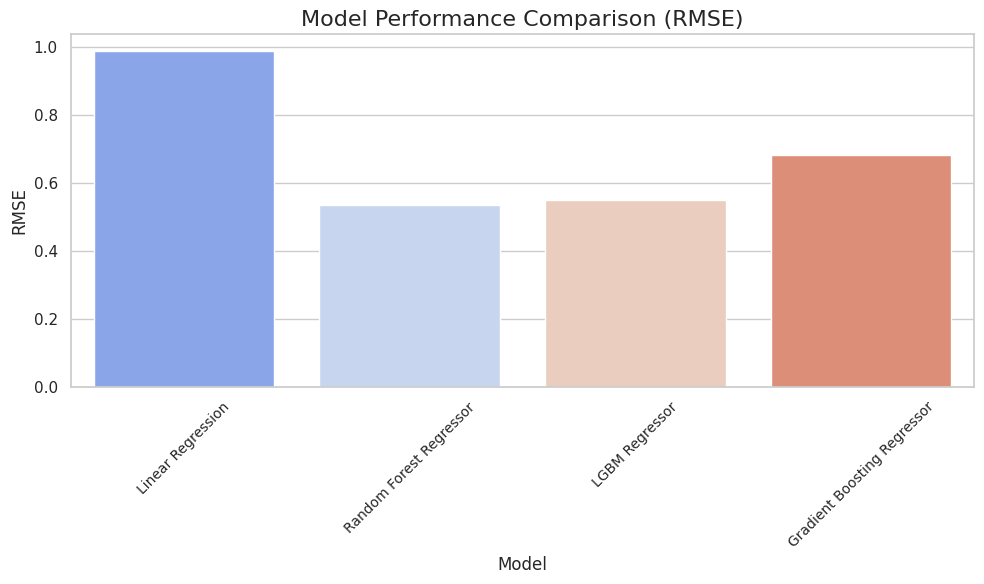

<ipython-input-9-7038fbf31297>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, palette="viridis")


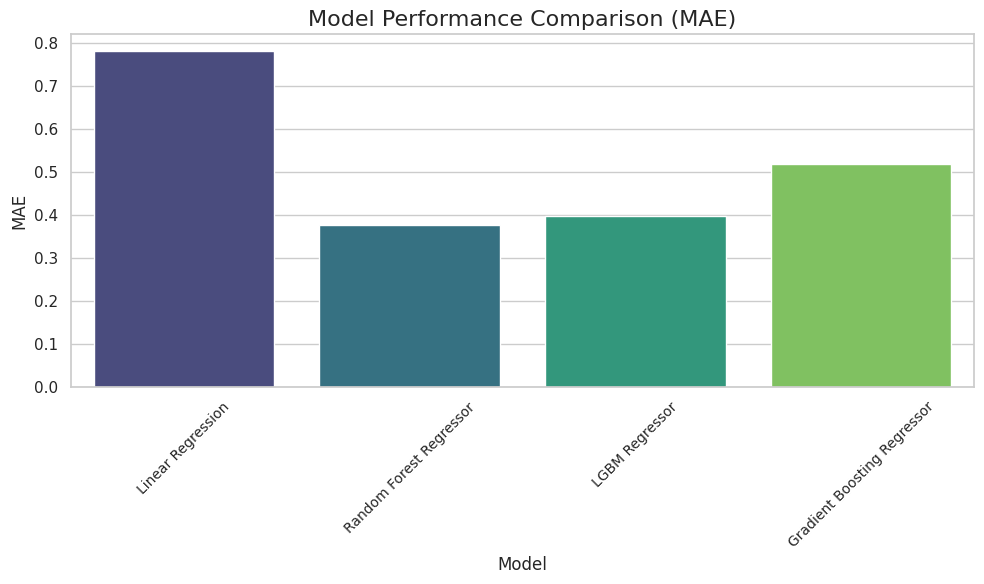

<ipython-input-9-7038fbf31297>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, palette="crest")


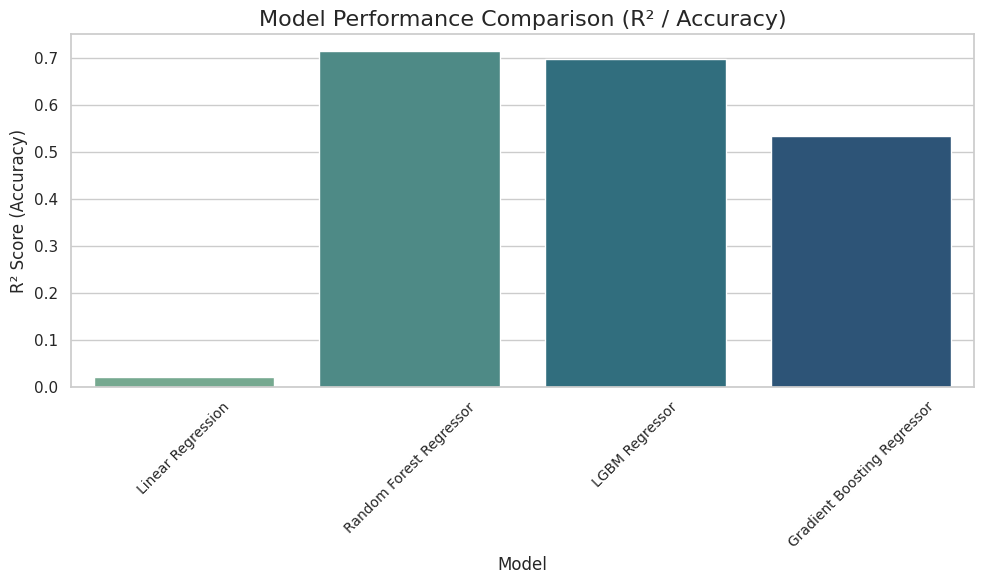

<ipython-input-9-7038fbf31297>:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Training Time (s)", data=results_df, palette="Blues")


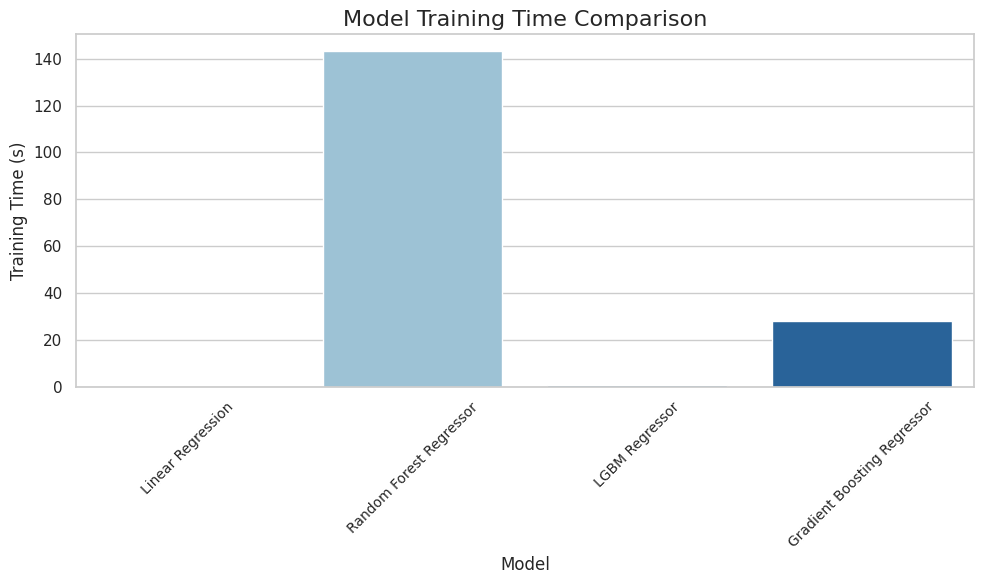

<ipython-input-9-7038fbf31297>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Testing Time (s)", data=results_df, palette="Purples")


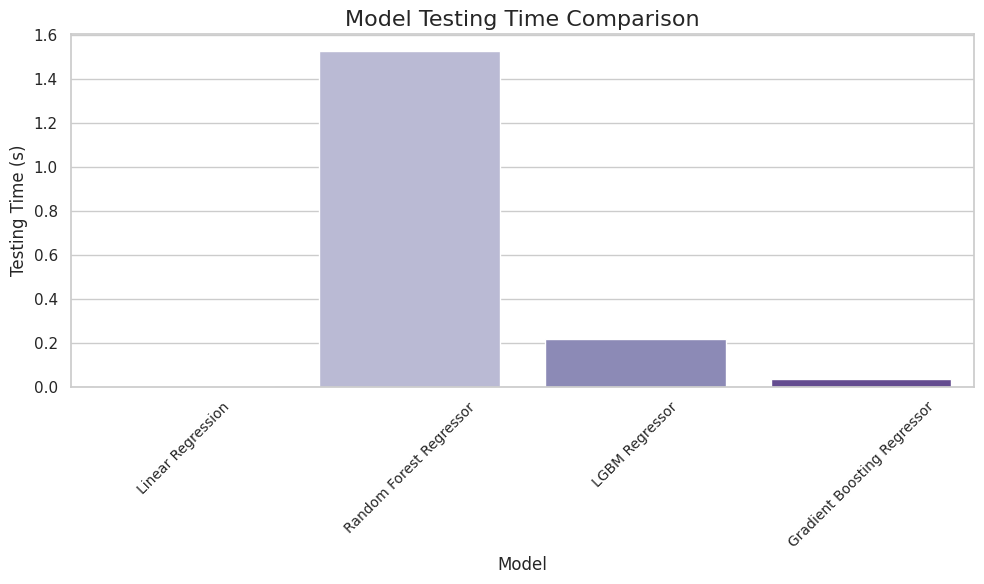

In [9]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = cleaned_df.drop(columns=['Unnamed: 0', 'key'], errors='ignore')  # Drop unnecessary columns

# Convert pickup_datetime to datetime and extract useful features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df = df.drop(columns=['pickup_datetime'])  # Drop original datetime column

# Handle missing values
df = df.dropna()

# Define features and target
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models (Removed XGBoost Regressor)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "LGBM Regressor": LGBMRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    try:
        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        train_time = end_train - start_train

        start_test = time.time()
        y_pred = model.predict(X_test)
        end_test = time.time()
        test_time = end_test - start_test

        # Calculate metrics
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results.append((name, rmse, mae, r2, train_time, test_time))

        # Print metrics
        print(f"\n{name} Performance:")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R² (Accuracy): {r2:.4f}")
        print(f"Training Time: {train_time:.4f} seconds")
        print(f"Testing Time: {test_time:.4f} seconds\n")
    except Exception as e:
        print(f"\n{name} encountered an error: {e}\n")
        results.append((name, None, None, None, None, None))

# Convert results to DataFrame
results_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "MAE", "R²", "Training Time (s)", "Testing Time (s)"]
)

# Format results as a styled DataFrame
results_styled = results_df.style.format({
    "RMSE": "{:.4f}",
    "MAE": "{:.4f}",
    "R²": "{:.4f}",
    "Training Time (s)": "{:.4f}",
    "Testing Time (s)": "{:.4f}"
}).set_caption("Model Performance Comparison").background_gradient(cmap="coolwarm", subset=["RMSE", "MAE", "R²"])

# Display the styled DataFrame
from IPython.display import display
display(results_styled)

# Visualizations
sns.set_theme(style="whitegrid")

# Plot RMSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="RMSE", data=results_df, palette="coolwarm")
plt.title("Model Performance Comparison (RMSE)", fontsize=16)
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot MAE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MAE", data=results_df, palette="viridis")
plt.title("Model Performance Comparison (MAE)", fontsize=16)
plt.ylabel("MAE", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot R² Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R²", data=results_df, palette="crest")
plt.title("Model Performance Comparison (R² / Accuracy)", fontsize=16)
plt.ylabel("R² Score (Accuracy)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Training Time (s)", data=results_df, palette="Blues")
plt.title("Model Training Time Comparison", fontsize=16)
plt.ylabel("Training Time (s)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot Testing Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Testing Time (s)", data=results_df, palette="Purples")
plt.title("Model Testing Time Comparison", fontsize=16)
plt.ylabel("Testing Time (s)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
